In [8]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)   #has only the features needed,no target column.
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# KMeans

KMeans is a popular unsupervised machine learning algorithm used to group data into K clusters based on similarity.
       The Iris dataset contains numerical and normalized features.
       KMeans is fast and works well for numerical and normalized features and  clusters.
       We choose K = 3 (we guess there are 3 flower types).
       KMeans randomly picks 3 flowers to start as "centroids.
       It groups all flowers based on which of the 3 is closest.
       It updates the centroid of each group to the average.
       It repeats until the clusters don’t change much.

C:\Users\SR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


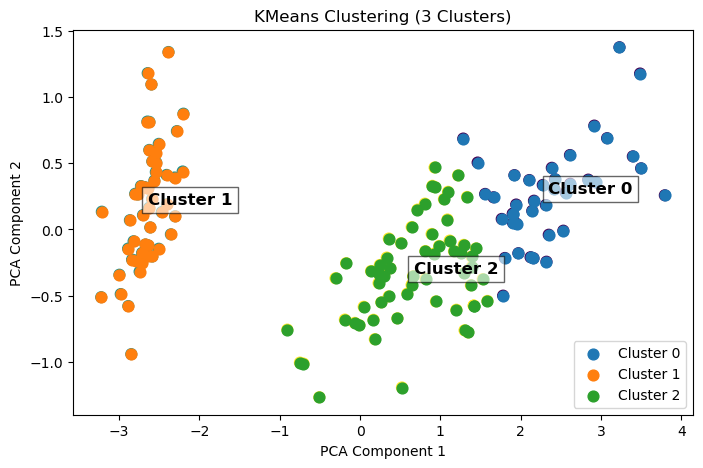

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
print(kmeans_labels)

pca = PCA(n_components=2)  # instantiate PCA object
PCA_result = pca.fit_transform(df)

plt.figure(figsize=(8,5))
plt.scatter(PCA_result[:, 0], PCA_result[:, 1], c=kmeans_labels, cmap='viridis', s=60)

clusters = np.unique(kmeans_labels)
for cluster in clusters:
    cluster_points = PCA_result[kmeans_labels == cluster]
    centroid = cluster_points.mean(axis=0)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=60, label=f'Cluster {cluster}')
    plt.text(centroid[0], centroid[1], f'Cluster {cluster}', fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [11]:
cluster_0_points = df[kmeans_labels == 0]
cluster_1_points = df[kmeans_labels == 1]
cluster_2_points = df[kmeans_labels == 2]
print("Cluster 0 points:\n", cluster_0_points)
print("Cluster 1 points:\n", cluster_1_points)
print("Cluster 2 points:\n", cluster_2_points)

Cluster 0 points:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                 7.0               3.2                4.7               1.4
52                 6.9               3.1                4.9               1.5
77                 6.7               3.0                5.0               1.7
100                6.3               3.3                6.0               2.5
102                7.1               3.0                5.9               2.1
103                6.3               2.9                5.6               1.8
104                6.5               3.0                5.8               2.2
105                7.6               3.0                6.6               2.1
107                7.3               2.9                6.3               1.8
108                6.7               2.5                5.8               1.8
109                7.2               3.6                6.1               2.5
110                6.5               3.2     

*To see the average sepal and petal length & width for each category of iris flowers (Setosa, Versicolor, Virginica)*.

In [14]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Categorical.from_codes(iris.target, iris.target_names)       
mean_by_species = df.groupby(species).mean()
print(mean_by_species)

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


C:\Users\SR\AppData\Local\Temp\ipykernel_4768\595976535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_species = df.groupby(species).mean()


*To see the number of correct predication in each cluster.*

In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(iris.data)

# Compare clusters to actual species
comparison = pd.crosstab(df['cluster'], df['species'])
print(comparison)


C:\Users\SR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


species  setosa  versicolor  virginica
cluster                               
0             0           3         36
1            50           0          0
2             0          47         14


# Hierarchical Clustering

In [ ]:
Hierarchical clustering builds a hierarchy of clusters either:
Agglomerative (bottom-up): Start with each point as its own cluster and merge them step-by-step.
Divisive (top-down): Start with one big cluster and split it.
Iris dataset is small,so it's suitable for hierarchical clustering.
Helps us visualize relationships between points using a dendrogram.
No need to predefine the number of clusters like KMeans (but we can cut the dendrogram at any level to get desired number of clusters).

*Dendrogram for Iris Dataset*.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


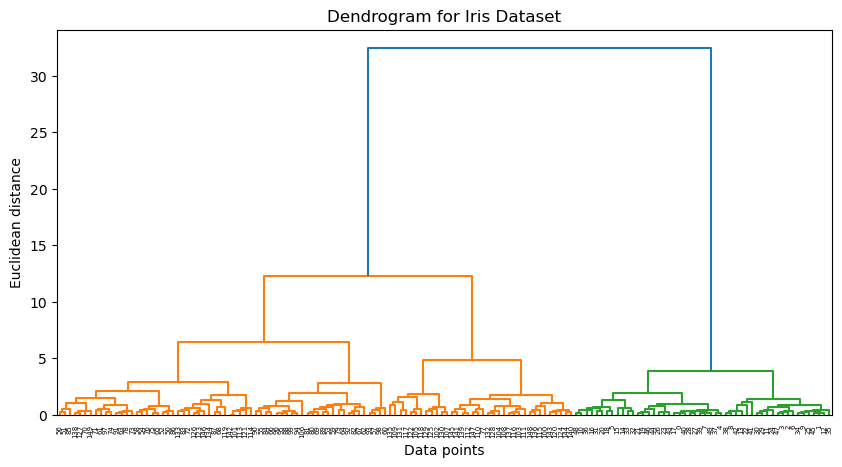

In [28]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)   #has only the features needed,no target column.
print(df.head())

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo_model.fit_predict(df)
df['agglo_cluster'] = agglo_labels
print(df['agglo_cluster'].value_counts())

agglo_cluster
0    64
1    50
2    36
Name: count, dtype: int64


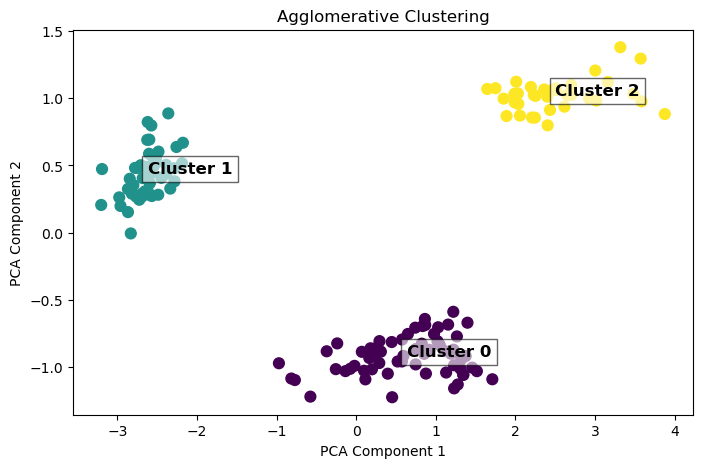

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(8,5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agglo_labels, cmap='viridis', s=60)

for cluster_id in np.unique(agglo_labels):
    x = pca_result[agglo_labels == cluster_id, 0].mean()
    y = pca_result[agglo_labels == cluster_id, 1].mean()
    plt.text(x, y, f'Cluster {cluster_id}', fontsize=12, weight='bold', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [31]:
cluster_0_points = df[agglo_labels == 0]
cluster_1_points = df[agglo_labels == 1]
cluster_2_points = df[agglo_labels == 2]

print("Cluster 0 points:\n", cluster_0_points)
print("Cluster 1 points:\n", cluster_1_points)
print("Cluster 2 points:\n", cluster_2_points)

Cluster 0 points:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
52                 6.9               3.1                4.9               1.5   
53                 5.5               2.3                4.0               1.3   
54                 6.5               2.8                4.6               1.5   
..                 ...               ...                ...               ...   
134                6.1               2.6                5.6               1.4   
138                6.0               3.0                4.8               1.8   
142                5.8               2.7                5.1               1.9   
146                6.3               2.5                5.0               1.9   
149                5.9               3.0                5.1               1.8   

     agg

*Compare clusters to actual species.*

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(df[iris.feature_names])

comparison = pd.crosstab(df['agglo_cluster'], df['species'])
print(comparison)

species        setosa  versicolor  virginica
agglo_cluster                               
0                   0          49         15
1                  50           0          0
2                   0           1         35


*Final result:Agglomerative Clustering performs slightly better on this dataset.*
In both methods setosa flowes are grouped perfectly, other two clusters shows  small mixing up of flowers.
Total correct kmeans = 50 + 47 + 36 = 133 / 150 = 88.7%
Total correct agglomerative= 50 + 49 + 35 = 134 / 150 = 89.3%